# Object detection with model zoo model

In this tutorial, you learn how to use a built-in model zoo model (SSD) to achieve an [object detection](https://en.wikipedia.org/wiki/Object_detection) task.

## Preparation

This dependecies are using PyTorch for Mac M1 support. 
Please install Pytorch for M1 via pip3/conda install in the Python/Coda environment for maximum speed

In [16]:
%dependency /add ai.djl:api:0.30.0
%dependency /add ai.djl.pytorch:pytorch-jni:2.4.0-0.30.0
%dependency /add ai.djl.pytorch:pytorch-model-zoo:0.30.0
%dependency /add org.slf4j:slf4j-simple:1.7.32
%dependency /resolve

Adding dependency ai.djl:api:0.30.0
Adding dependency ai.djl.pytorch:pytorch-jni:2.4.0-0.30.0
Adding dependency ai.djl.pytorch:pytorch-model-zoo:0.30.0
Adding dependency org.slf4j:slf4j-simple:1.7.32
Solving dependencies
Resolved artifacts count: 12
Add to classpath: /Users/rainer/Library/Jupyter/kernels/rapaio-jupyter-kernel/mima_cache/ai/djl/api/0.30.0/api-0.30.0.jar
Add to classpath: /Users/rainer/Library/Jupyter/kernels/rapaio-jupyter-kernel/mima_cache/com/google/code/gson/gson/2.11.0/gson-2.11.0.jar
Add to classpath: /Users/rainer/Library/Jupyter/kernels/rapaio-jupyter-kernel/mima_cache/com/google/errorprone/error_prone_annotations/2.27.0/error_prone_annotations-2.27.0.jar
Add to classpath: /Users/rainer/Library/Jupyter/kernels/rapaio-jupyter-kernel/mima_cache/net/java/dev/jna/jna/5.14.0/jna-5.14.0.jar
Add to classpath: /Users/rainer/Library/Jupyter/kernels/rapaio-jupyter-kernel/mima_cache/org/apache/commons/commons-compress/1.27.1/commons-compress-1.27.1.jar
Add to classpath: /Us

In [18]:
import ai.djl.modality.cv.*;
import ai.djl.modality.cv.output.*;
import ai.djl.modality.cv.util.*;
import ai.djl.pytorch.zoo.*;
import ai.djl.repository.zoo.*;
import ai.djl.training.util.*;

## Step 1: Load image

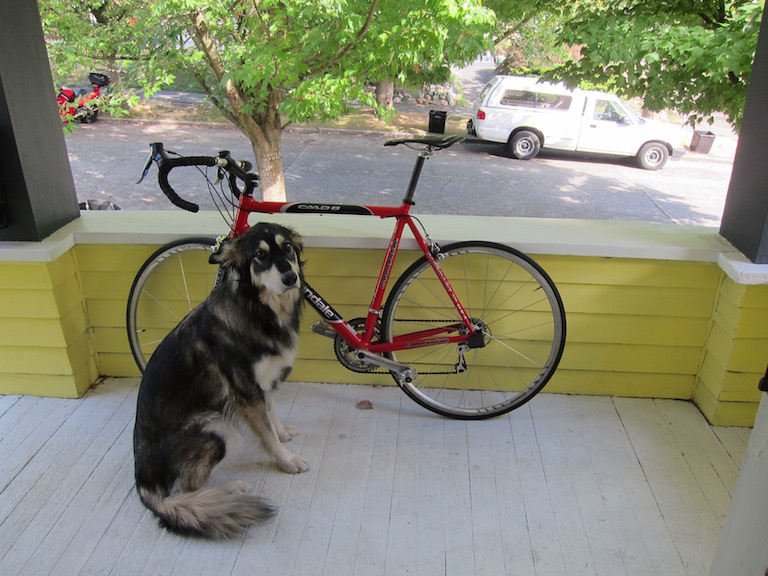

In [21]:
var img = ImageFactory.getInstance().fromUrl("https://resources.djl.ai/images/dog_bike_car.jpg");
img.getWrappedImage()

## Step 2: Load model zoo model

In this example, you load a SSD (Single Shot MultiBox Detector) model from the MXNet model zoo. For more information about model zoo, see the [Model Zoo Documentation](https://github.com/deepjavalibrary/djl/blob/master/docs/model-zoo.md)

In [63]:
var criteria = Criteria.builder()
    .setTypes(Image.class, DetectedObjects.class)
    .optArtifactId("ssd")
    .optProgress(new ProgressBar())
    .build();
var model = criteria.loadModel();

Loading:     100% |████████████████████████████████████████|


## Step 3: Create Predictor and detect an object in the image

In [66]:
var detections = model.newPredictor().predict(img);

detections

[
	{"class": "dog", "probability": 0,96922, "bounds": {"x"=0,162, "y"=0,357, "width"=0,250, "height"=0,545}}
	{"class": "bicycle", "probability": 0,66656, "bounds": {"x"=0,152, "y"=0,249, "width"=0,570, "height"=0,558}}
	{"class": "truck", "probability": 0,62682, "bounds": {"x"=0,610, "y"=0,131, "width"=0,284, "height"=0,167}}
]

## Check detected result

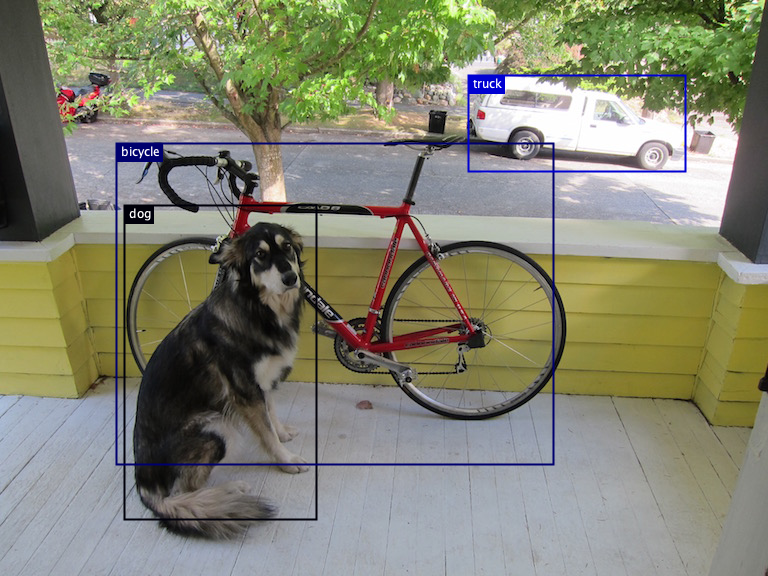

In [69]:
img.drawBoundingBoxes(detections);
img.getWrappedImage()

## Summary

Using the model zoo model provided, you can run inference with just the following lines of code:

In [73]:
var img = ImageFactory.getInstance().fromUrl("https://resources.djl.ai/images/dog_bike_car.jpg");
var criteria = Criteria.builder()
    .setTypes(Image.class, DetectedObjects.class)
    .optArtifactId("ssd")
    .build();
var model = criteria.loadModel();
var detections = model.newPredictor().predict(img);

In [74]:
detections

[
	{"class": "dog", "probability": 0,96922, "bounds": {"x"=0,162, "y"=0,357, "width"=0,250, "height"=0,545}}
	{"class": "bicycle", "probability": 0,66656, "bounds": {"x"=0,152, "y"=0,249, "width"=0,570, "height"=0,558}}
	{"class": "truck", "probability": 0,62682, "bounds": {"x"=0,610, "y"=0,131, "width"=0,284, "height"=0,167}}
]